In [1]:
pwd


'C:\\Users\\Nivethaa\\Music\\ml projects'

In [2]:
import pandas as pd #this is for since we work with tabular format
import matplotlib.pyplot as plt#display of the graph
import seaborn as sns #it is also used for graph attractiveness
from sklearn.model_selection import train_test_split #importing since we need to train and test data
from sklearn.linear_model import LinearRegression #we have only one dependent variable i.e saleprice to detect,hence linear regression
from sklearn.linear_model import Lasso #helps in shrinking less important features and avoid overfitting
from sklearn import metrics #accuracy purpose

In [3]:
#loading the dataset from csv to pandas dataframe
car_dataset=pd.read_csv('car data.csv')


In [5]:
#looking at the first 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#checking the total number of rows and columns in the entire dataset
car_dataset.shape #and we get 301 different cars and has 9 rows

(301, 9)

In [7]:
#getting information of the dataset
car_dataset.info(),#since there is no nullvalues hence no need of imputers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#checking the number of missing values
car_dataset.isnull().sum()#,hence there is no missing values in the dataset

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#getting value counts of each category
print(car_dataset.Fuel_Type.value_counts()) #we get the number of each fuel types

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [12]:
print(car_dataset.Seller_Type.value_counts()) #we get the count of number of dealers and indivuduals

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [13]:
print(car_dataset.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [14]:
#conveting text format to binary numbers so as to be read by the system
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [15]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
#splitting the data to training and test data,since we are going to predict the sales price hence it is Y(dependent) and rest all are independents and also there is no use of car_name hence we remove it
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)#if dropping column then axis is 1 and if dropping row axis is 0
Y=car_dataset['Selling_Price']

In [17]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [19]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)#90 percent data for training and remaining 10 for testing,random state can be anything


In [21]:
#training the model
regressor=LinearRegression()
regressor.fit(X_train,Y_train)#for initial value we fit corresponding sellingprice values

LinearRegression()

In [22]:
#prediction on training data
pred=regressor.predict(X_train) #ok after training the model we test again with the training data before testing on test data to ensure least error

In [25]:
# R square error for checking how accurately our model has predicted
error_score=metrics.r2_score(Y_train,pred)
print(error_score)

0.8799451660493701


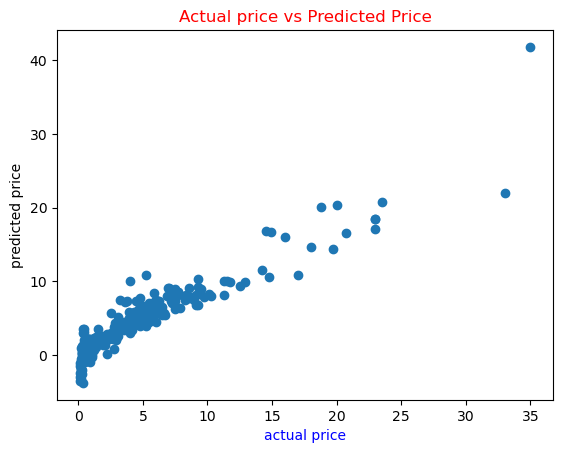

In [26]:
#visualising the model for training data
plt.scatter(Y_train,pred)
plt.title("Actual price vs Predicted Price",color='red')
plt.xlabel("actual price",color='blue')
plt.ylabel("predicted price")
plt.show()

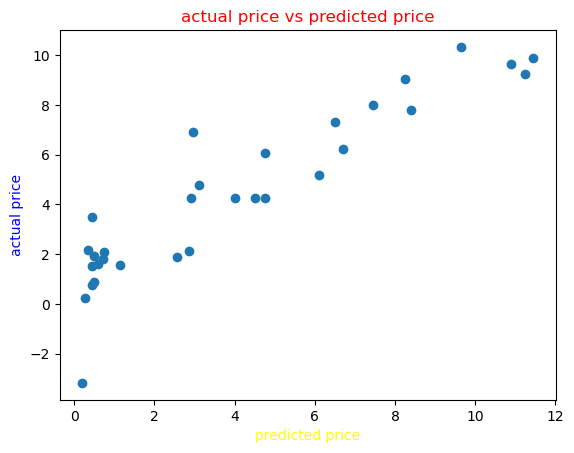

In [27]:
#visualise the prdiction for testing data
plt.scatter(Y_test,regressor.predict(X_test))
plt.title("actual price vs predicted price",color='red')
plt.xlabel("predicted price",color='yellow')
plt.ylabel("actual price",color='blue')
plt.show()

In [28]:
#using lasso regression
lasso_regressor=Lasso()
lasso_regressor.fit(X_train,Y_train)
predict=lasso_regressor.predict(X_train)
error=metrics.r2_score(Y_train,predict)
print(error)

0.8427856123435794


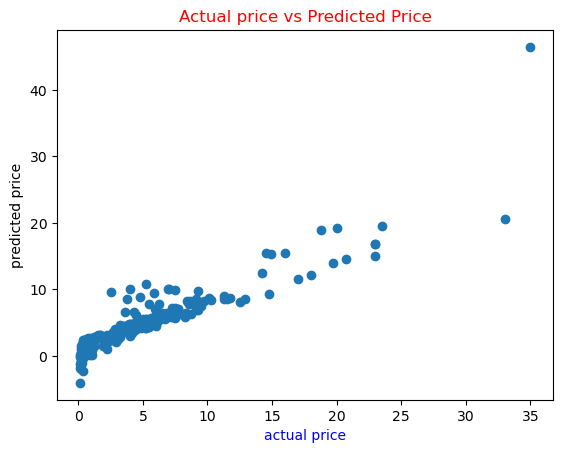

In [29]:
#visualising the training data for lasso
plt.scatter(Y_train,predict)
plt.title("Actual price vs Predicted Price",color='red')
plt.xlabel("actual price",color='blue')
plt.ylabel("predicted price")
plt.show()

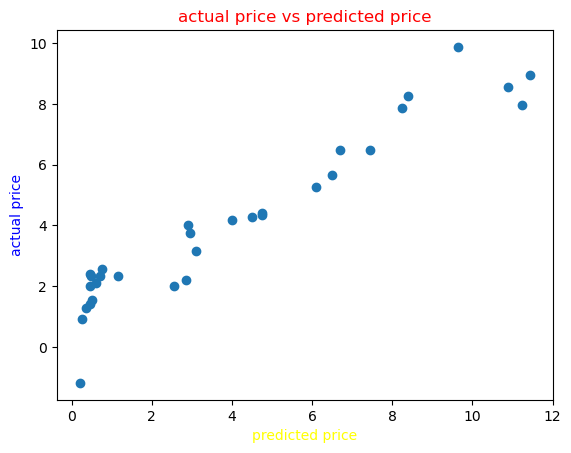

In [30]:
#visualising the graph for lasso testing data
plt.scatter(Y_test,lasso_regressor.predict(X_test))
plt.title("actual price vs predicted price",color='red')
plt.xlabel("predicted price",color='yellow')
plt.ylabel("actual price",color='blue')
plt.show()

In [33]:
new_car = pd.DataFrame({  #my own example to predict
    'Year': [2015],
    'Present_Price': [6.78],
    'Kms_Driven': [3000],
    'Fuel_Type': [0],  # Encoded value for Petrol
    'Seller_Type': [1],  # Encoded value for Individual
    'Transmission': [0],  # Encoded value for Manual
    'Owner': [0]
})
predicted_price = regressor.predict(new_car)
print(predicted_price)

[3.92789449]


In [34]:
new_car = pd.DataFrame({  #my own example to predict
    'Year': [2015],
    'Present_Price': [6.78],
    'Kms_Driven': [3000],
    'Fuel_Type': [0],  # Encoded value for Petrol
    'Seller_Type': [1],  # Encoded value for Individual
    'Transmission': [0],  # Encoded value for Manual
    'Owner': [0]
})
predicted_price = lasso_regressor.predict(new_car)
print(predicted_price)

[4.93956937]
